## Week 02 Assignment

In [104]:
# import necessary packages
import pandas as pd

In [105]:
# import csv file to be analyzed
rent_index = pd.read_csv("ZillowObservedRentIndex.csv")

In [106]:
# view column and row number of dataset
rent_index.shape

(495, 99)

Dataset is 495 rows long and 99 columns wide

In [107]:
# print first 5 rows of dataset
rent_index.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
0,102001,0,United States,country,NaN,1311.959165,1322.062319,1331.874762,1342.029034,1348.204067,...,1885.040691,1910.209451,1932.421986,1956.918131,1977.373073,1990.621112,1995.946769,1994.088952,1985.869006,1980.753447
1,394913,1,"New York, NY",msa,NY,2371.695412,2390.239699,2407.674698,2425.763695,2434.844754,...,2892.442671,2946.200005,3004.200237,3065.282551,3118.191119,3141.708285,3138.787642,3115.914765,3084.449038,3062.217042
2,753899,2,"Los Angeles, CA",msa,CA,1925.055524,1938.059810,1951.263602,1962.786811,1978.899355,...,2803.734806,2838.344695,2872.020353,2896.723121,2917.400800,2930.629771,2937.995343,2933.546117,2924.797421,2916.552972
3,394463,3,"Chicago, IL",msa,IL,1402.921523,1415.559115,1426.659315,1449.962961,1456.240522,...,1748.036323,1769.652943,1794.750091,1815.131999,1833.937232,1842.028147,1844.769901,1843.357960,1837.598605,1838.888337
4,394514,4,"Dallas, TX",msa,TX,1161.731654,1172.255965,1184.271792,1192.173857,1198.469735,...,1725.037148,1748.497553,1776.853758,1810.438003,1834.600190,1844.543825,1843.759104,1831.681597,1817.135760,1802.254987


- RegionID is a unique value for each observation, this is not necessary considering we have RegionName.
- The RegionType is not valuable considering each region is an MSA (besides the first row which represents values for the U.S. - we will manage this later).
- Most columns represent Rent Index values for different months starting in 3/31/2015. We do not need all of these data points for the purposes of this assignment and will drop them later.

In [108]:
# clean up and simplify dataset
rent_index_clean = rent_index[['RegionName', 'StateName', '12/31/2022']]
# drop first row as it is not an MSA
rent_index_clean = rent_index_clean.drop(index=0)
# rename columns
rent_index_clean.columns = ['RegionName', 'StateName', 'RentIndex']
# print first 5 rows of dataset to check
rent_index_clean.head()

,RegionName,StateName,RentIndex
1,"New York, NY",NY,3062.217042
2,"Los Angeles, CA",CA,2916.552972
3,"Chicago, IL",IL,1838.888337
4,"Dallas, TX",TX,1802.254987
5,"Houston, TX",TX,1654.290082


Successfully reduced dataset width and removed U.S. from consideration.

In [109]:
# view data types for each column
rent_index_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 1 to 494
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  494 non-null    object 
 1   StateName   494 non-null    object 
 2   RentIndex   494 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.7+ KB


We have 3 columns, 2 being object datatypes and 1 being a float datatype.

In [110]:
# confirm there are no missing values
rent_index_clean.isnull().sum()

RegionName    0
StateName     0
RentIndex     0
dtype: int64

It does not appear there are any missing values from our dataset.

In [111]:
# since dataset is large, lets just focus on California --> filter for rows that where StateName == CA
rent_index_clean_CA = rent_index_clean[rent_index_clean['StateName'] == "CA"]
# print first 5 rows of dataset to check
rent_index_clean_CA.head()

,RegionName,StateName,RentIndex
2,"Los Angeles, CA",CA,2916.552972
12,"San Francisco, CA",CA,3100.367345
13,"Riverside, CA",CA,2513.500571
17,"San Diego, CA",CA,2990.959908
26,"Sacramento, CA",CA,2264.300467


It appears we successfully trimmed out all non-California states from the observations.

In [112]:
# run value counts on new data frame
rent_index_clean_CA.value_counts()

RegionName           StateName  RentIndex  
Bakersfield, CA      CA         1680.077995    1
Chico, CA            CA         1604.335937    1
Visalia, CA          CA         1736.634615    1
Vallejo, CA          CA         2394.515351    1
Ukiah, CA            CA         1929.166667    1
Truckee, CA          CA         2263.492063    1
Susanville, CA       CA         1322.500000    1
Stockton, CA         CA         2329.591129    1
Santa Rosa, CA       CA         2623.056395    1
Santa Maria, CA      CA         3550.273740    1
Santa Cruz, CA       CA         3438.195370    1
San Luis Obispo, CA  CA         2636.834325    1
San Jose, CA         CA         3216.475715    1
San Francisco, CA    CA         3100.367345    1
San Diego, CA        CA         2990.959908    1
Salinas, CA          CA         2458.242203    1
Sacramento, CA       CA         2264.300467    1
Riverside, CA        CA         2513.500571    1
Redding, CA          CA         1489.667735    1
Red Bluff, CA        CA  

Value_counts are not super helpful here since every observation is unique but is useful to view new dataset

In [113]:
# query data to see which regions have a rent index value greater than the total US rent index value
expensive = rent_index_clean_CA[rent_index_clean_CA['RentIndex'] > 1980]
expensive

,RegionName,StateName,RentIndex
2,"Los Angeles, CA",CA,2916.552972
12,"San Francisco, CA",CA,3100.367345
13,"Riverside, CA",CA,2513.500571
17,"San Diego, CA",CA,2990.959908
26,"Sacramento, CA",CA,2264.300467
35,"San Jose, CA",CA,3216.475715
72,"Oxnard, CA",CA,2942.037875
77,"Stockton, CA",CA,2329.591129
111,"Santa Rosa, CA",CA,2623.056395
120,"Vallejo, CA",CA,2394.515351


Queried data for MSAs that have higher values than the U.S. average for rent index values. Most of these MSAs make sense as they are major metropolitan areas with high population sizes, are coastal or are known for high productivity.

In [115]:
# determine what percentage of regions in CA are above the US average value
(expensive.shape[0]/rent_index_clean_CA.shape[0])*100

53.125

More than half of the MSAs in CA are more expensive than the average U.S. value.

In [90]:
# drop StateName column since it is no longer useful
rent_index_clean_CA = rent_index_clean_CA.drop(columns = 'StateName').copy()
rent_index_clean_CA.head()

,RegionName,RentIndex
2,"Los Angeles, CA",2916.552972
12,"San Francisco, CA",3100.367345
13,"Riverside, CA",2513.500571
17,"San Diego, CA",2990.959908
26,"Sacramento, CA",2264.300467


Successfully removed StateName from dataframe.

In [116]:
# sort by rent index values in descending order
rent_index_clean_CA = rent_index_clean_CA.sort_values(by = ['RentIndex'], ascending = False)

<AxesSubplot: title={'center': 'Rent Index Values for California MSAs'}, xlabel='RegionName'>

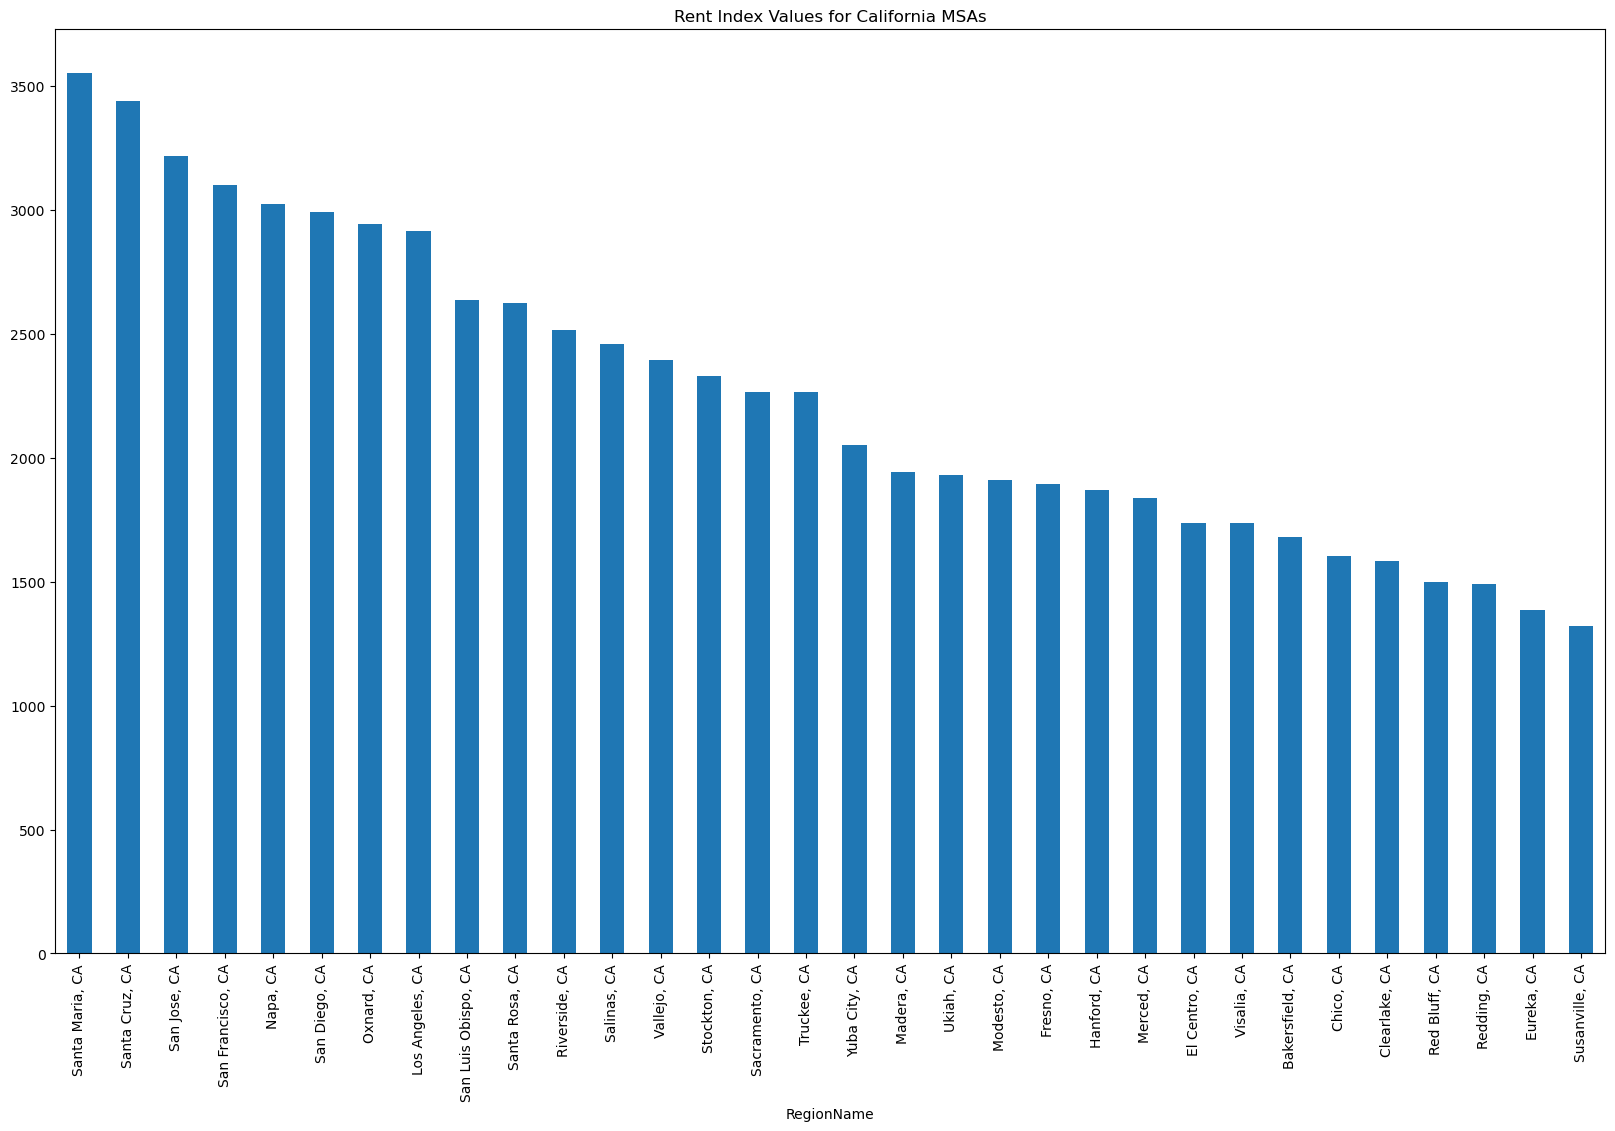

In [117]:
# plot rent index values for California MSAs in descending order
rent_index_clean_CA.plot.bar(
    figsize=(20,12), 
    x = 'RegionName', 
    y = 'RentIndex', 
    title = 'Rent Index Values for California MSAs',
    legend = False
)

Successfully plotted bar graph demonstrating rent index values for California MSAs in descending order. Highly populated and coastal MSAs with high economic productivity dominate the upper half of the list while smaller and more inland MSAs occupy the lower end of the list.